<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_ANS/blob/main/ANS_Paises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.
Comenzamos importando las librerías necesarias para realizar todos los procesos relacionados con el modelo de predicción.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Preprocesamiento y elección de variables relevantes para el estudio.

## Importacion de los datos del dataset.
Descargar el archivo pertinente y lo importamos para comenzar con su análisis y preprocesamiento.


In [2]:
df = pd.read_csv('Country-data.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.
Analizando las primeras y últimas filas del dataframe, observamos que hay variables numericas excepto la del nombre de los jugadores que se podria considerar como un ID.

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


## Modificaciones de los datos.
Eliminamos la varible ID y transformamos los valores de la variable Gender.

In [5]:
df = df.set_index('country')

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [6]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


## Mostrar parámetros estadísticos de los datos.
Mostramos los parámetros estadísticos de los datos para analizarlos y comprender mejor estos.

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Comprobar la existencia de datos nulos
Comprobamos la existencia de nulos para estudiar si es necesario rellenar esos datos.

In [9]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Mostramos un histograma
Hacemos un estudio del histograma de los datos para ver como están repartidos y seleccionar los datos mas interesantes para hacer la división de cluster.

<ipython-input-10-41f6ce8af5f0>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

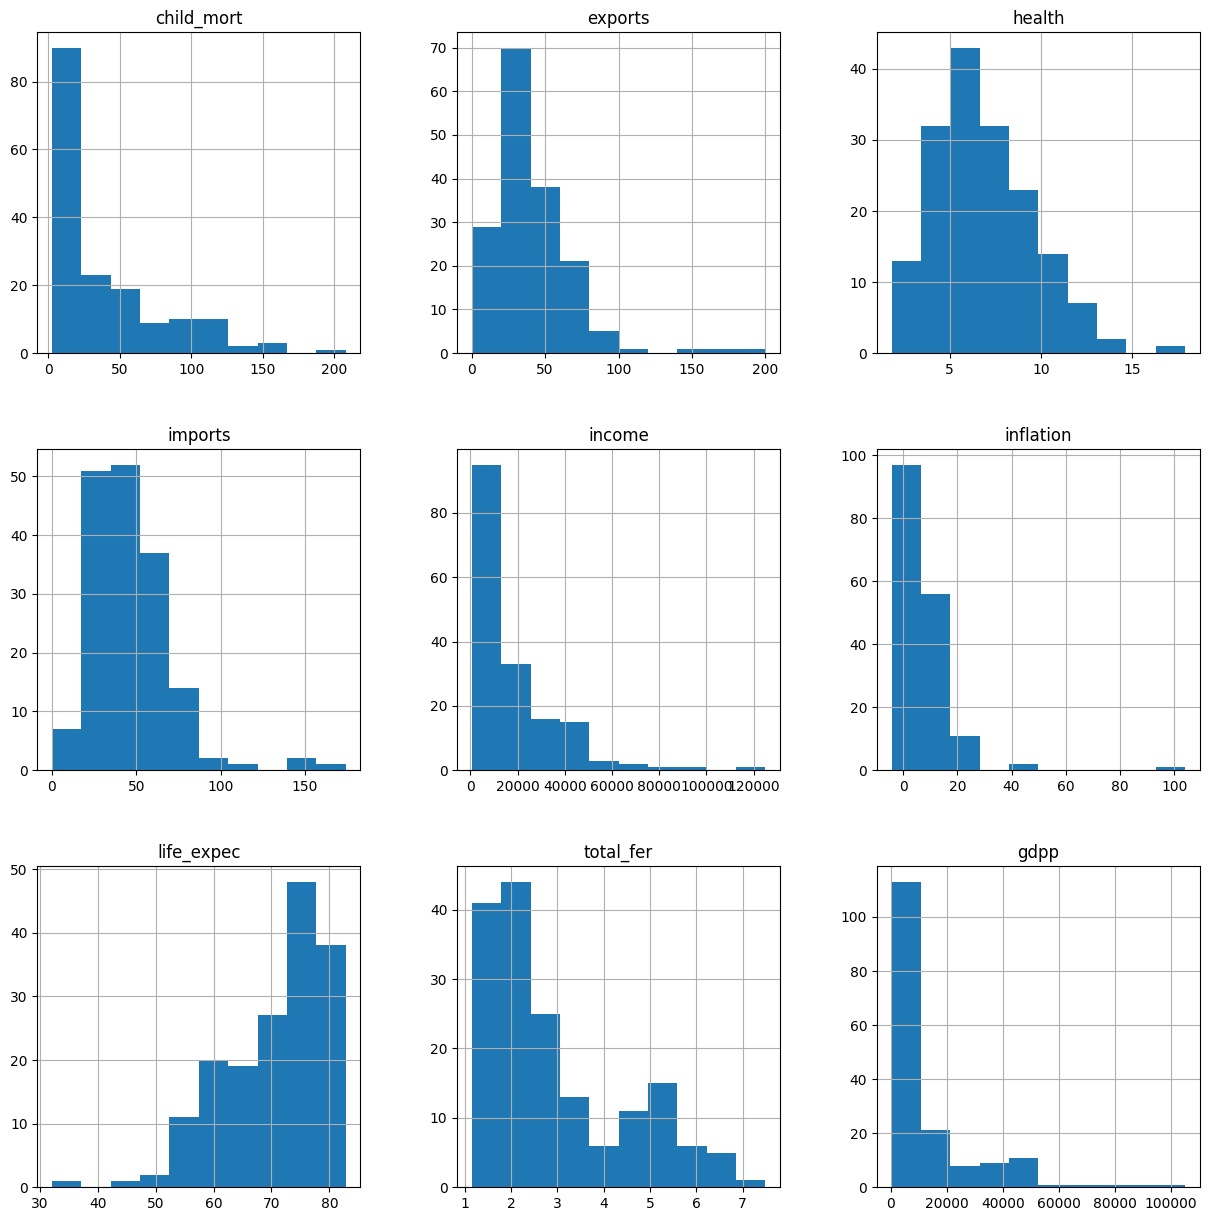

In [10]:
df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())

## Estudiamos la relacion cruzada.
En este caso no tiene mucho sentido realizar este esturio.

## Elección de variables relevantes
Habiendo realizado el estudio estadístico anterior, en este caso realizaremos el estudio con con todas las variables debido a que no son demasiadas.

# Escalamiento y detección de outliers.

## Escalamiento.


### Estudio de las escalas.
Aqui usamos la funcion boxplot para ver la escala de los datos y visualizar de forma rapida si es necesario escalarlos.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:#474646'` for same effect.
  warnings.warn(msg, FutureWarning)


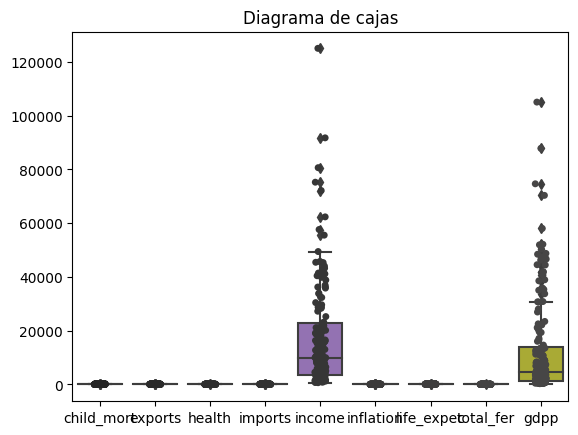

In [11]:
sns.boxplot(df)
sns.stripplot(df, color = '#474646')
plt.title('Diagrama de cajas')
plt.show()

### Estudio de correlación.
En este caso vemos si existe una correlacion excesivamente alta entre alguno de los datos para escalar alguno de ellos para evitar sobre entrenamiento.

<Axes: >

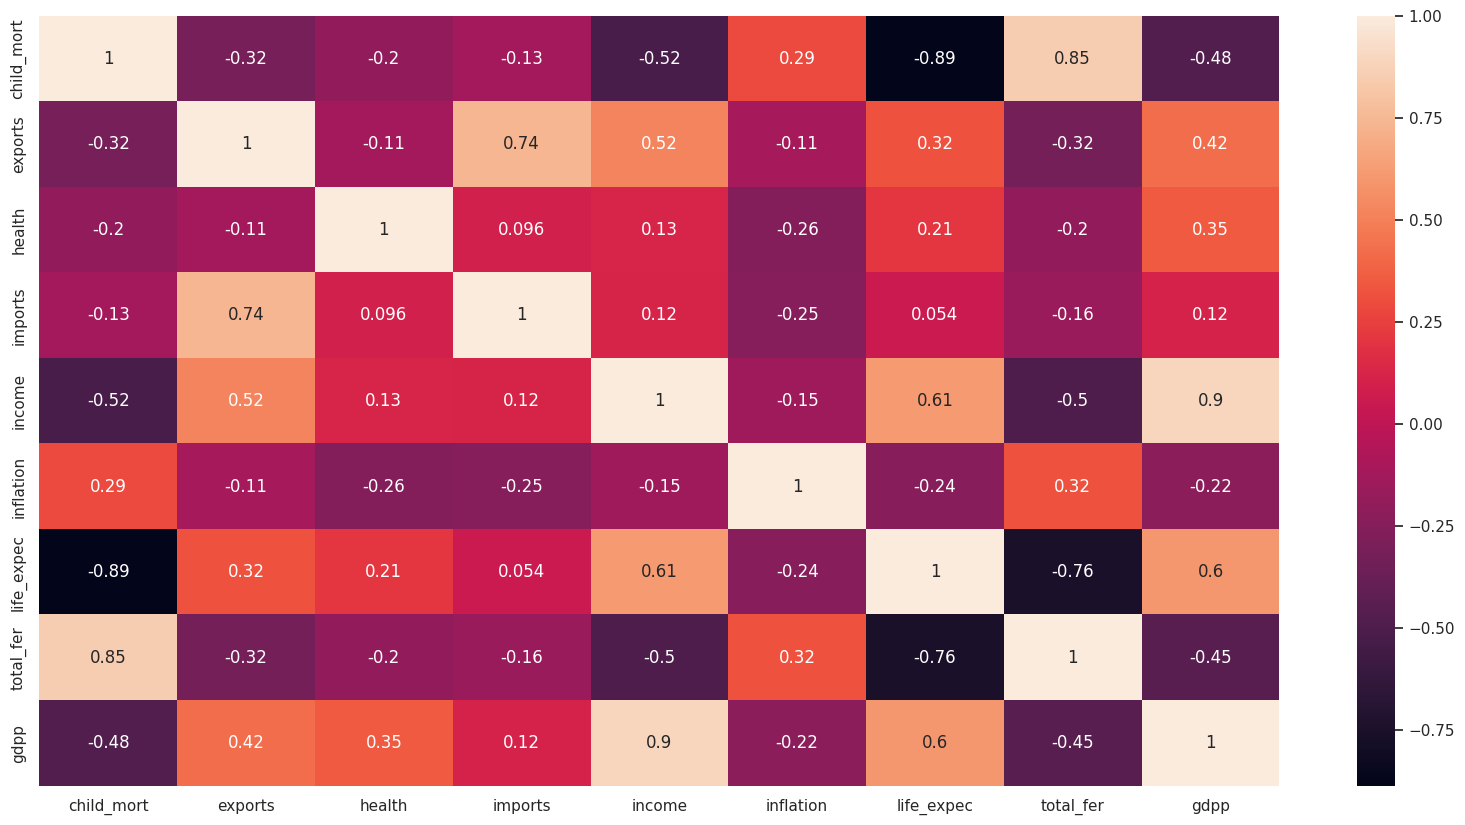

In [12]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(df.corr(), annot=True)

### Escalamiento de datos.
En este caso vemos que existen dos columnas que tienen una escala superior a la del resto de datos por lo que seria recomendable escalarlos.

In [13]:
scaler = MinMaxScaler()

In [14]:
df['income'] = scaler.fit_transform(df[['income']])

In [15]:
df['gdpp'] = scaler.fit_transform(df[['gdpp']])

In [16]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,0.132933,7.781832,70.555689,2.947964,0.121536
std,40.328931,27.412010,2.746837,24.209589,0.154980,10.570704,8.893172,1.513848,0.174944
min,2.600000,0.109000,1.810000,0.065900,0.000000,-4.210000,32.100000,1.150000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,0.022076,1.810000,65.300000,1.795000,0.010490
50%,19.300000,35.000000,6.320000,43.300000,0.075174,5.390000,73.100000,2.410000,0.042274
75%,62.100000,51.350000,8.600000,58.750000,0.178397,10.750000,76.800000,3.880000,0.131900
max,208.000000,200.000000,17.900000,174.000000,1.000000,104.000000,82.800000,7.490000,1.000000


## Detectar los outliers y eliminarlos.

### Jacknife

In [17]:
X = df.to_numpy()
SSE = []
K = 4

In [18]:
for i in range(0, X.shape[0]):
  df_np = np.delete(X, i, axis = 0)
  kmeans = KMeans(n_clusters = K, n_init = 10, random_state = 100).fit(df_np)
  SSE.append(kmeans.inertia_)

In [19]:
sigma = np.std(SSE)
mu = np.mean(SSE)

umbral = 2

outliers = []
for i in range(0, X.shape[0]):
  if np.abs(SSE[i] - mu) > umbral * sigma:
    outliers.append(df.index[i])

print(outliers)

['Equatorial Guinea', 'Haiti', 'Nigeria']


In [20]:
df = df.drop(outliers)

# Determinar el valor de k (número de grupos)

## Optimizando la función BIC

In [21]:
def BIC(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return k, gmm.bic(X)

In [22]:
bic_score = pd.DataFrame([BIC(k, df) for k in range(2, 30)], columns=['k', 'BIC'])

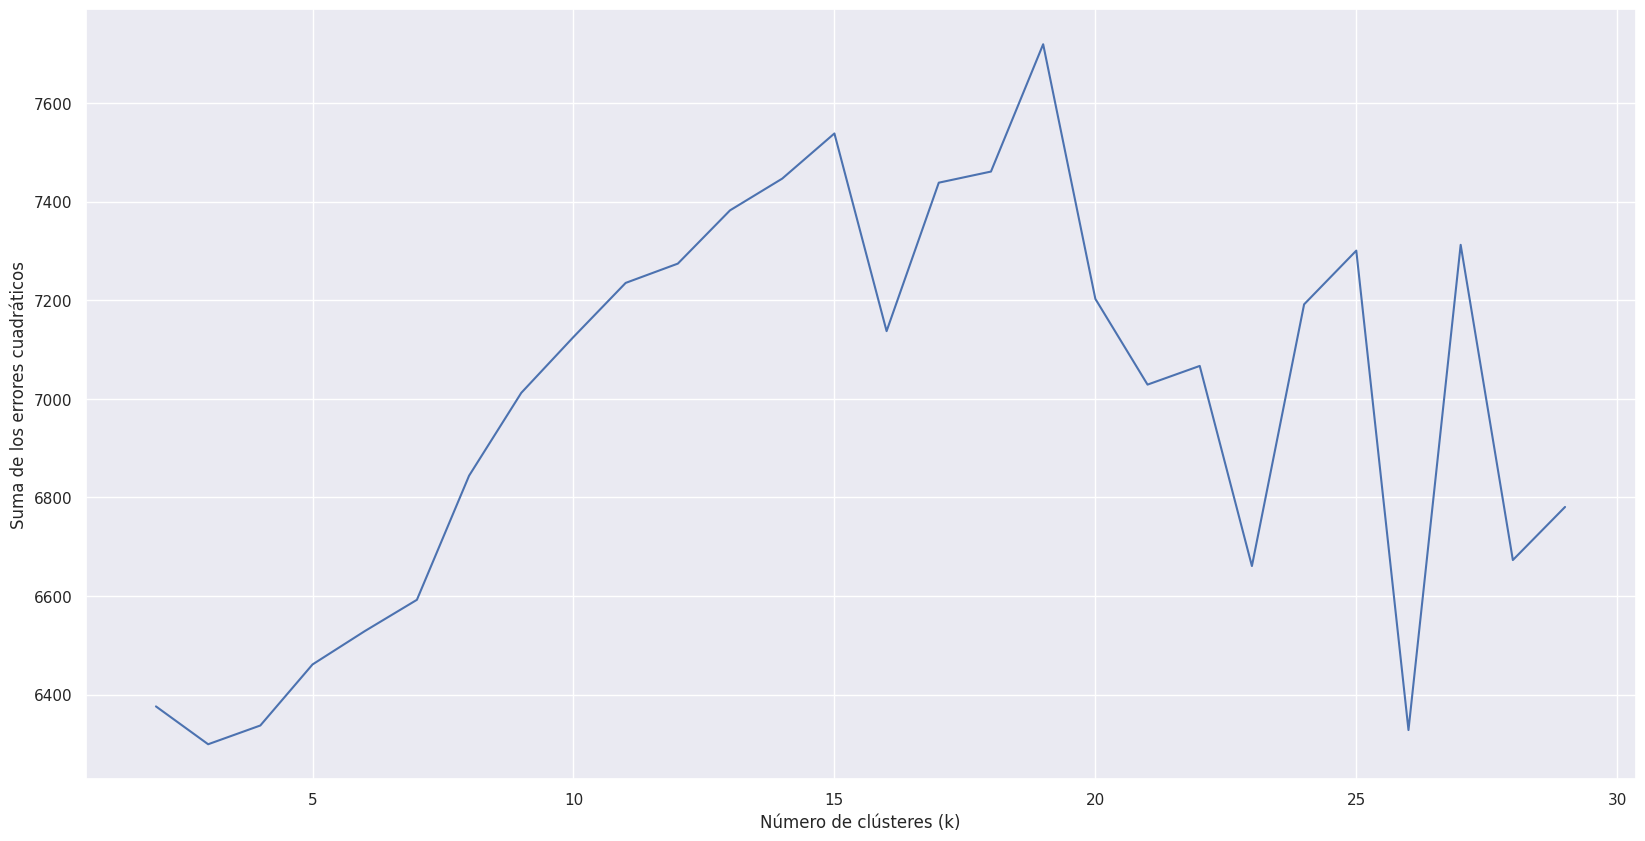

In [23]:
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(bic_score['k'],bic_score['BIC'])

In [24]:
k_optimized = bic_score[bic_score.BIC == bic_score.BIC.min()]
k_optimized

,k,BIC
1,3,6299.519269


In [25]:
k = k_optimized['k'].values[0]

# Ejecución de análisis con los datos calculados (k y n_init)

In [26]:
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
kmeans.fit(df)
labels = kmeans.labels_
pred = kmeans.predict(df)
centroides = kmeans.cluster_centers_

In [27]:
labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [28]:
centroides

array([[8.85088889e+01, 2.42444222e+01, 6.19155556e+00, 3.98081311e+01,
        1.65353156e-02, 9.59011111e+00, 6.05844444e+01, 4.85488889e+00,
        9.65319470e-03],
       [1.67827586e+01, 4.41362069e+01, 7.09275862e+00, 4.67956897e+01,
        1.69107062e-01, 6.26083621e+00, 7.46439655e+01, 2.20103448e+00,
        1.55475050e-01],
       [4.13333333e+00, 1.76000000e+02, 6.79333333e+00, 1.56666667e+02,
        5.09878796e-01, 2.46800000e+00, 8.14333333e+01, 1.38000000e+00,
        5.47257936e-01]])

In [29]:
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [30]:
df['label'] =  labels
fig = px.scatter_3d(df, x='life_expec', y='income', z='gdpp',
              color='label')
fig.show()

# Mostrar para el análisis anterior una tabla.

In [31]:
group = df.groupby(['label']).count() 

In [32]:
result = []

for idx, x in enumerate(centroides):
    # print(x)
    row = [
        idx, 
        group.loc[[idx]]['child_mort'].values[0],
        x[0],
        x[1],
        x[2],
        x[3],
        x[4],
        x[5],
        x[6],
        x[7],
        x[8]
    ]
    result.append(row)
result = pd.DataFrame(result,columns=['grupo', 'values','center_child_mort','center_exports','center_health','center_imports','center_income','center_inflation','center_life_expec','center_total_fer','center_gdpp'])
result

,grupo,values,center_child_mort,center_exports,center_health,center_imports,center_income,center_inflation,center_life_expec,center_total_fer,center_gdpp
0,0,45,88.508889,24.244422,6.191556,39.808131,0.016535,9.590111,60.584444,4.854889,0.009653
1,1,116,16.782759,44.136207,7.092759,46.795690,0.169107,6.260836,74.643966,2.201034,0.155475
2,2,3,4.133333,176.000000,6.793333,156.666667,0.509879,2.468000,81.433333,1.380000,0.547258


# Realiza una descripción semántica de los grupos

In [33]:
df[df['label'] == 0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,88.508889,24.244422,6.191556,39.808131,0.016535,9.590111,60.584444,4.854889,0.009653,0.0
std,28.629187,13.919834,2.738319,18.391528,0.021726,6.776801,5.716004,1.227354,0.015577,0.0
min,47.000000,0.109000,1.970000,0.065900,0.000000,0.885000,46.500000,2.330000,0.000000,0.0
25%,63.600000,14.900000,4.470000,28.600000,0.006279,4.150000,56.800000,4.270000,0.003016,0.0
50%,88.200000,22.200000,5.250000,36.400000,0.010137,8.790000,60.700000,5.050000,0.005030,0.0
75%,109.000000,30.300000,7.650000,45.900000,0.019704,14.000000,65.300000,5.560000,0.009440,0.0
max,160.000000,62.300000,13.100000,101.000000,0.118907,26.500000,71.100000,7.490000,0.081312,0.0


El grupo 0 esta compuesto por 45 paises con:

Tienen un child_mort del 88.5.

Su importación (39.8) y exportación (24.24).

Su income es de 16535 netos.

La inflation es 9.5.

La life_expec es de 60.

El total_fer es 4.8.

Es un grupo de paises del tercer mundo con una mortalidad infantil extremadamente alta, una economia baja y una esperanza de vida medio-baja.

In [34]:
df[df['label'] == 1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,16.782759,44.136207,7.092759,46.795690,0.169107,6.260836,74.643966,2.201034,0.155475,1.0
std,13.438609,19.503000,2.758676,19.143837,0.150349,7.496076,5.313679,0.749929,0.173618,0.0
min,2.600000,10.700000,1.810000,11.800000,0.009414,-4.210000,57.100000,1.230000,0.005297,1.0
25%,6.000000,28.425000,5.080000,30.950000,0.063718,1.205000,71.575000,1.590000,0.035855,1.0
50%,14.000000,39.950000,6.845000,46.400000,0.123329,3.840000,75.450000,2.040000,0.076206,1.0
75%,21.950000,54.150000,8.965000,60.400000,0.234671,8.607500,78.800000,2.605000,0.214701,1.0
max,63.900000,103.000000,17.900000,108.000000,1.000000,45.900000,82.800000,4.950000,0.835829,1.0


El grupo 1 esta compuesto por 116 paises con:

Tienen un child_mort del 16.7.

Su importación (46) y exportación (44).

Su income es de 169107 netos.

La inflation es 6.26.

La life_expec es de 74.6.

El total_fer es 2.2.

Es un grupo de paises del primer mundo con una mortalidad infantil media, una economia media y una esperanza de vida alta.

In [35]:
df[df['label'] == 2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,4.133333,176.000000,6.793333,156.666667,0.509879,2.468000,81.433333,1.380000,0.547258,2.0
std,2.309401,23.515952,2.492877,16.165808,0.260957,2.179718,1.205543,0.240624,0.410538,0.0
min,2.800000,153.000000,3.960000,142.000000,0.222613,-0.046000,80.300000,1.150000,0.199191,2.0
25%,2.800000,164.000000,5.865000,148.000000,0.398670,1.787000,80.800000,1.255000,0.320887,2.0
50%,2.800000,175.000000,7.770000,154.000000,0.574728,3.620000,81.300000,1.360000,0.442583,2.0
75%,4.800000,187.500000,8.210000,164.000000,0.653512,3.725000,82.000000,1.495000,0.721292,2.0
max,6.800000,200.000000,8.650000,174.000000,0.732296,3.830000,82.700000,1.630000,1.000000,2.0


El grupo 2 esta compuesto por 3 paises con:

Tienen un child_mort del 4.1.

Su importación (156) y exportación (176).

Su income es de 509879 netos.

La inflation es 2.46.

La life_expec es de 81.43.

El total_fer es 1.38.

Es un grupo de paises del primer mundo con una baja mortalidad infantil, una economía bastante alta y una esperanza de vida muy alta.